<a href="https://colab.research.google.com/github/therealWOT/Math1005/blob/main/PHYS2011_Wk1_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS2011 - geometric optics via Python ⚡

## Welcome to optics tutorials!

We're going to start with something a little different. Since lectures happen quite late in the week we'll begin with a computational tutorial covering some interesting results from geometric optics, which you should be familiar with from earlier courses (or possibly highschool).

In a modern research lab, having a solid grasp of computational methods and programming languages is an invaluable skill. The language Python (which this notebook uses) is particularly popular among many researchers across disciplines. Other popular languages for research include Matlab and R. You'll meet more Python next semester in your computational labs if you take PHYS2X12. However, it's never too early to start! As you go through this tutorial see if you can pick up any patterns in how the programming language is used to produce output.


## Instructions

This tutorial **does not** require any previous programming knowledge, to get meaningful results you only need to read the notes (in text boxes like these) and play with some input values (these lines are marked by a comment - a piece of text that is not interpreted as code - written as `## YOUR VALUES HERE`). The text above these cells will also be marked with a ⭕

More generally, cells that begin with a `# Code` comment are purely to help with the Python implementation of the physics, usually by providing useful features or formatting. You should not need to edit these (but feel free to take a look, play around and ask a tutor what they mean!).

Cells that begin with a `# science` comment implement some actual physics, feel free to take a closer look at these and see how we translate the science into code.

To run a cell and see the output press `ctrl + enter`. Don't forget to run any cells in which you make changes for these to take effect!

For those with more coding experience, there are some more challenging questions at the end of the notebook with minimal structure provided. There are two levels of challenge with increasing levels of complexity (and decreasing levels of structure provided). These are marked as the "Python knights ⚔" and "Python ninjas 🥷" sections.

See if you can come up with a neat solution and share it with your tutors. The best solutions will be shown in next week's tutorial.




In [4]:
# Code

# These are Python modules, they extend the functionality of Python and allow us
# to do things like make and display plots (matplotlib = "MATLAB plotting library")
# or manipulate tables and vectors of numbers (NumPy = "numerical python")
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Code

from typing import TypeAlias
Vector: TypeAlias = list[float]

def clear_ray():
  variables = ['pos', 'pos_list', 'angle', 'direction', 'position']

  for var in variables:
    if var in globals():
      del var
  return

## Tracing a single ray ➡ ➡

We will begin by tracing the path of a single ray of monochromatic light.

The starting position ($r_0$) and direction ($s_0$) of the ray can each be encoded as a two element vector:

$r_0 = x_0\pmb{\hat{x}} + y_o\pmb{\hat{y}}$

$s_0 = \cos(\theta_0)\pmb{\hat{x}} + \sin(\theta_0)\pmb{\hat{y}}$

Here, $s_0$ is a unit vector inclined by $\theta_0$ degrees from the horizontal.

In Python, we can represent these vectors as lists (or arrays) of 2 elements:

`pos = [pos_x, pos_y]`

`direction = [dir_x, dir_y]`

To move the ray forward in space (or equivalently here, time), we increment the position using the direction vector and some step size, $h$:

$\pmb{r_1} = \pmb{r_0} + h\times\pmb{\hat{s_0}}$

This is what the function below implements. Run the cell and then test out the function with some values!

In [6]:
# SCIENCE

def move_ray(position: Vector, direction: Vector, step_size=0.05):
  '''A function that moves a ray forward in time (space) along a given direction.'''
  position = [position[0] + step_size * direction[0], position[1] + step_size * direction[1]]
  return position

Here is an example of how to use this function:

In [7]:
# SCIENCE

position = [0, 0]
direction = [1, 0]
new_position = move_ray(position = position, direction = direction, step_size = 1)
print(new_position)


[1, 0]


⭕ Now test it out for yourself with some different direction vectors. Some suggestions:


*   $\theta = 45^{\circ}$
*   $\theta = 30^{\circ}$
*   $\theta = 60^{\circ}$
*   $\theta = 180^{\circ}$

Note that you may find the `np.deg2rad()` function helpful!

In [8]:
# SCIENCE

#########################################
#            YOUR VALUES HERE           #
#########################################

position = [0,0]
theta = np.array([30, 45, 60, 180])
angle = np.deg2rad(theta)
direction = [np.cos(angle), np.sin(angle)]
new_position = move_ray(position = position, direction = direction, step_size = 1)
print(new_position[0])
print(new_position[1])

#########################################

[ 0.8660254   0.70710678  0.5        -1.        ]
[5.00000000e-01 7.07106781e-01 8.66025404e-01 1.22464680e-16]


⭕ Now we are going to update the ray position several times and plot it so we can see how the ray moves in space. Feel free to play with the code below and make some different plots.

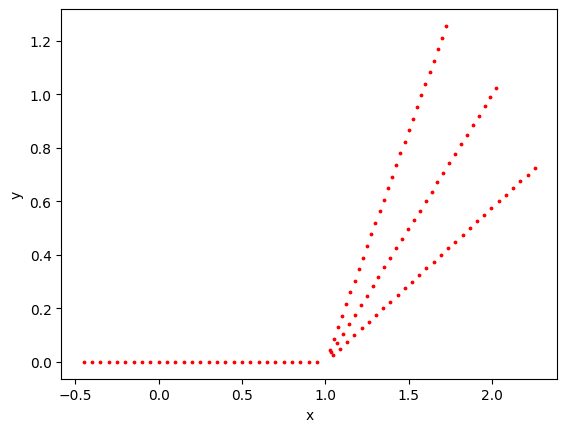

In [10]:
# SCIENCE

clear_ray()

#########################################
#            YOUR VALUES HERE           #
#########################################
#fill in your values of choice here!

pos = [1,0]
angle = angle
direction = [np.cos(angle), np.sin(angle)]

#########################################

# a list to keep track of the changing positions
pos_list = [pos]

# setting up a plotting object
fig, ax = plt.subplots()

# moving the ray forward in spacetime
for step in range(1, 30):
  pos = move_ray(position = pos, direction = direction)
  pos_list.append(pos)
  ax.scatter(pos[0], pos[1], c = 'r', s = 3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Refraction in different media ↪ ⤵


Recall that when light passes from one region to another *with a different refractive index* the wavefronts will change speeds. If the light enters this region at an angle this will cause the waves to bend so that the rays trace out different directions as seen below:

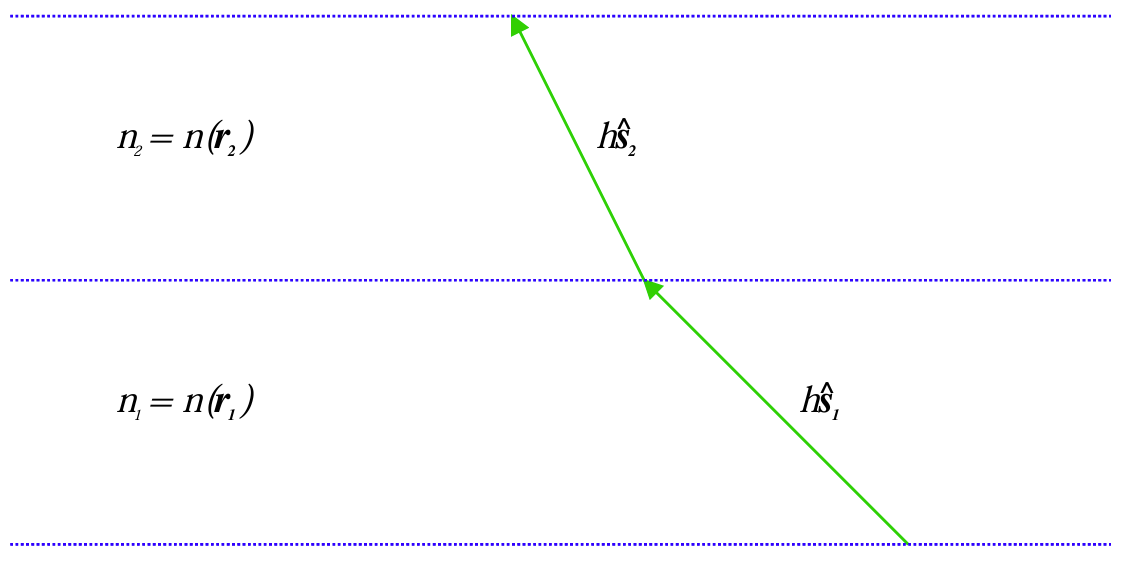


Figure 1: Diagram illustrating refraction at a sharp boundary between media of differing refractive indices.

We can use some simple trigonometry to help us calculate these paths of refraction. First, consider the path of the ray as follows:



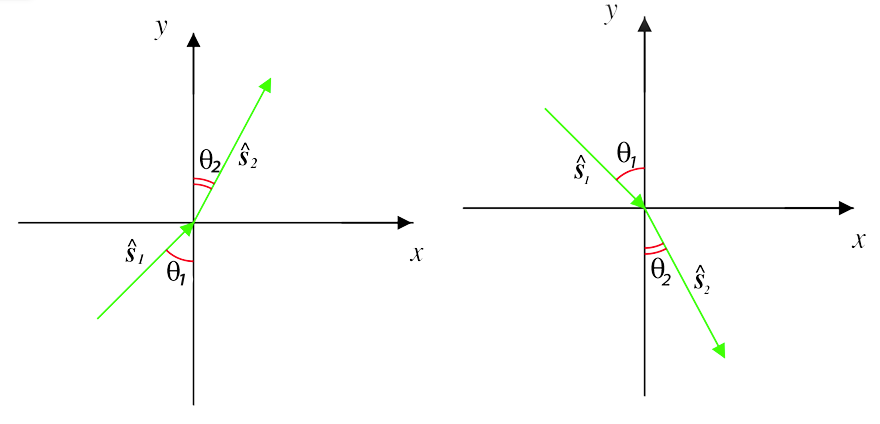

Figure 2: **Left:** Refraction of a ray travelling in the positive $y$ direction. **Rights:** refraction of a ray travelling in the negative $y$ direction.

Then, recalling Snell's law:

\begin{equation}
n_1\sin(\theta_1) = n_2\sin(\theta_2)
\end{equation}

We can determine that, for a ray travelling in the positive $y$ direction with direction vector $\pmb{\hat{s_1}}$, the *new direction vector* upon entering the second medium is:

\begin{equation}
\pmb{\hat{s_2}} = \sin(\theta_2)\hat{x} + \text{sign}(\pmb{\hat{s_1}})\cos(\theta_2)\hat{y}
\end{equation}

The function below translates this to Python (with an extra little check for total internal reflection!). Feel free to take a look but you should not need to change anything.

In [11]:
# SCIENCE
def refract_ray(n1: float, n2: float, direction_vector: Vector):
  '''A function that returns the new direction of a ray after it undergoes refraction.'''
  theta1 = np.arcsin(direction_vector[0])

  # if we have total internal reflection send it back!
  if (n1/n2)*np.sin(theta1) > 1:
    theta2 = np.pi - theta1

  # otherwise as usual
  else:
    theta2 = np.arcsin(n1 * np.sin(theta1)/n2)

  direction_vector_new = [np.sin(theta2), np.cos(theta2) * np.sign(direction_vector[1])]

  # otherwise proceed on through
  return direction_vector_new

⭕ Now it's your turn again! Have a play with the following code to view refraction under different conditions. Some things you should consider:

*     How does refraction change with angle of incidence, $\theta$? Does it happen at *all* incident angles?

*     How does refraction change with the refractive indices of each medium ($n_1, n_2$)?

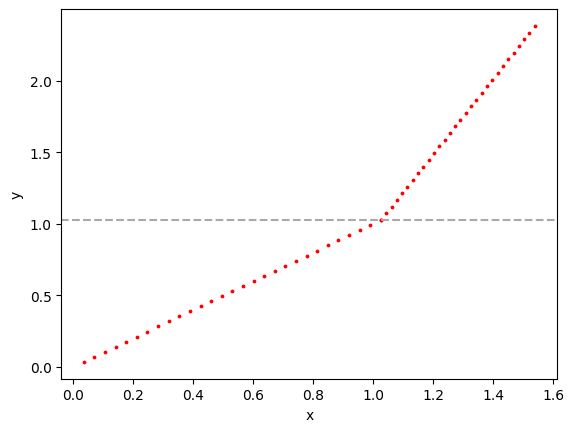

In [12]:
# SCIENCE

clear_ray()

#########################################
#            YOUR VALUES HERE           #
#########################################
# you will need a position, angle and direction for the ray
pos = [0,0]
theta =  np.deg2rad(45)
angle = theta
direction = [np.cos(angle), np.sin(angle)]
#########################################

pos_list = [pos]

fig, ax = plt.subplots()

for step in range(1, 30):
  pos = move_ray(position = pos, direction = direction)
  pos_list.append(pos)
  ax.scatter(pos[0], pos[1], c = 'r', s = 3)

#########################################
#            YOUR VALUES HERE           #
#########################################
# enter some refractive indices for medium 1 and medium 2 below

# I would recommend n1 = 1, and 1 < n2 < 3

n1 = 1
n2 = 2

#########################################

new_direction_vector = refract_ray(n1 = n1, n2 = n2, direction_vector = direction)
ax.axhline(pos_list[-1][1], c = 'darkgrey', linestyle = '--')
ax.scatter(pos[0], pos[1], c = 'r', s = 3)
for step in range(1, 30):
  pos = move_ray(position = pos, direction = new_direction_vector)
  pos_list.append(pos)
  ax.scatter(pos[0], pos[1], c = 'r', s = 3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

The following two cells set up some important computational elements to allow us to do more complex things with refraction. You do not need to edit them, but feel free to have a look around!

In [13]:
# SCIENCE

def check_medium_n(position: Vector, m1_bounds, m2_bounds, \
                   m3_bounds = (None, None), m1_n = 1.0, \
                   m2_n = 1.0, m3_n = None):
  '''A function that returns the refractive index at the current location of a ray'''
  if position[1] <= m1_bounds[1]:
    return m1_n
  elif position[1] <= m2_bounds[1]:
    return m2_n
  else:
    return m3_n

In [14]:
# Code

def plot_media(m1_bounds = (0, 1), m2_bounds = (1, 2), \
               m3_bounds = (np.nan, np.nan), m1_type = 'air', \
               m2_type = 'glass', m3_type = None):
  fig, ax = plt.subplots()

  #shading for materials
  shadings = ['white', 'lightgray', 'lightsteelblue']
  materials = ['air', 'glass', 'water']
  ax.axhspan(ymin = m1_bounds[0], ymax = m1_bounds[1], \
             color = shadings[materials.index(m1_type)], alpha = 1, zorder = 1)
  ax.axhspan(ymin = m2_bounds[0], ymax = m2_bounds[1], \
             color = shadings[materials.index(m2_type)], alpha = 1, zorder = 1)

  #boundary lines
  ax.axhline(m1_bounds[1], c = 'k', linestyle = '-', linewidth = 1)
  ax.axhline(m2_bounds[1], c = 'k', linestyle = '-', linewidth = 1)

  #text
  text_spacing = 0.2
  ax.text(s = m1_type, x = 0.1, y = m1_bounds[1] - text_spacing, \
          fontsize = 14, horizontalalignment = 'center')
  ax.text(s = m2_type, x = 0.1, y = m2_bounds[1] - text_spacing, \
          fontsize = 14, horizontalalignment = 'center')

  #axis ticklabels
  plt.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    right=False,
    labelleft=False,)

  #optional third material
  if not np.isnan(m3_bounds[0]):
    ax.axhline(m3_bounds[1], c = 'k', linestyle = '-', linewidth = 1)
    ax.text(s = m3_type, x = 0.1, y = m3_bounds[1] - text_spacing, \
            fontsize = 14, horizontalalignment = 'center')
    ax.axhspan(ymin = m3_bounds[0], ymax = m3_bounds[1], \
               color = shadings[materials.index(m3_type)], alpha = 1, \
               zorder = 1)

  #axis limits
  ax.set_ylim([np.min([m1_bounds[0], 0]), \
               np.nanmax([m2_bounds[1], m3_bounds[1], 2])])
  return fig, ax

Now we're going to see what this looks like for a ray passing through a prism of a higher refractive index.

⭕ Make sure to set up your initial ray position and direction. ⭕

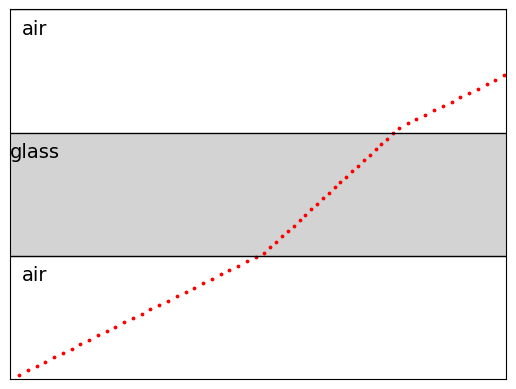

In [15]:
# SCIENCE

clear_ray()

# set up our media
medium_1 = 'air'
medium_1_boundaries = (0, 1)
medium_1_n = 1

medium_2 = 'glass'
medium_2_boundaries = (1, 2)
medium_2_n = 1.5

medium_3 = 'air'
medium_3_boundaries = (2, 3)
medium_3_n = 1

#########################################
#            YOUR VALUES HERE           #
#########################################
# set up our ray

pos = [0,0]
angle = theta
direction = [np.cos(angle), np.sin(angle)]

#########################################

pos_list = [pos]
refractive_index = medium_1_n

# set up the plot
fig, ax = plot_media(m1_bounds = medium_1_boundaries, m1_type = medium_1, \
                     m2_bounds = medium_2_boundaries, m2_type = medium_2, \
                     m3_bounds = medium_3_boundaries, m3_type = medium_3,)
ax.set_xlim([0,2])

# move the ray forwards
for step in range(1, 100):
  #update position
  pos = move_ray(position = pos, direction = direction)
  # stop if we are at the boundary of the final medium
  if pos[1] > medium_3_boundaries[1]:
    break

  # check which medium we are in
  refractive_index_new = check_medium_n(position = pos, m1_bounds = medium_1_boundaries, \
                                    m2_bounds = medium_2_boundaries, m1_n = medium_1_n, \
                                    m2_n = medium_2_n, m3_bounds = medium_3_boundaries, \
                                    m3_n = medium_3_n)

  # if we are in a new medium, update our direction vector
  if refractive_index_new != refractive_index:
    new_direction = refract_ray(n1 = refractive_index, \
                                n2 = refractive_index_new, \
                                direction_vector = direction)
    #if we have reflected, keep the refractive index the same
    if new_direction[1] != -direction[1]:
      refractive_index = refractive_index_new
    direction = new_direction

  ax.scatter(pos[0], pos[1], c = 'r', s = 3)
  pos_list.append(pos)

plt.show()

## Total internal reflection 🔄


Recall that total internal reflection occurs when a ray passes from a region of high refractive index to one of a low(er) refractive index *and* the angle of incidence is larger than the critical angle $\theta_c$:

\begin{equation}
  \sin(\theta_c) = \dfrac{n_2}{n_1}
\end{equation}

This is already implemented in `refract_ray()` so all we have to do is set up our ray as before to see it in action. If you want to see how this is done scroll back up to where the function was defined.

⭕ Once again, set up the initial conditions for your ray. **BUT NOTE** you will need to make sure that your angle $\theta > \theta_c$ for the media. We recommend starting with the following media (air has been pre-populated for you):

*     Glass: $n = 1.5$
*     Air: $n = 1$

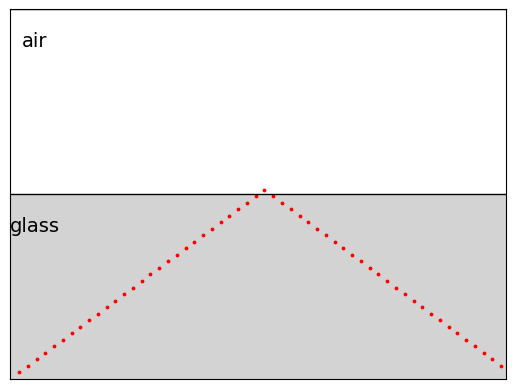

In [16]:
# SCIENCE

clear_ray()

#########################################
#            YOUR VALUES HERE           #
#########################################
# set up our media
medium_1 = 'glass'
medium_1_boundaries = (0, 1)
medium_1_n = 1.5

# now enter some values for medium 2
# I have left some suggested medium boundaries and a label
# here for you

medium_2 = 'air'
medium_2_boundaries = (1, 2)
medium_2_n = 1


# set up our ray with a pos, angle and direction
pos = [0,0]
angle = theta
direction = [np.cos(angle), np.sin(angle)]

#########################################

pos_list = [pos]
refractive_index = medium_1_n

# set up the plot
fig, ax = plot_media(m1_bounds = medium_1_boundaries, m1_type = medium_1, \
                     m2_bounds = medium_2_boundaries, m2_type = medium_2)
ax.set_xlim([0,2])

# move the ray forwards
for step in range(1, 80):
  #update position
  pos = move_ray(position = pos, direction = direction)
  # stop if we are at the boundary of the final medium
  if pos[1] > medium_2_boundaries[1]:
    break

  # check which medium we are in
  refractive_index_new = check_medium_n(position = pos, m1_bounds = medium_1_boundaries, \
                                    m2_bounds = medium_2_boundaries, m1_n = medium_1_n, \
                                    m2_n = medium_2_n)

  # if we are in a new medium, update our direction vector
  if refractive_index_new != refractive_index:
    new_direction = refract_ray(n1 = refractive_index, \
                                n2 = refractive_index_new, \
                                direction_vector = direction)
    #if we have reflected, keep the refractive index the same
    if new_direction[1] != -direction[1]:
      refractive_index = refractive_index_new
    direction = new_direction

  ax.scatter(pos[0], pos[1], c = 'r', s = 3)
  pos_list.append(pos)

plt.show()

## Dispersion 🌈


Dispersion occurs due to a refractive index that is a function of wavelength:

\begin{equation}
  n = n(\lambda)
\end{equation}

This causes rays of different wavelengths to be refracted by different amounts, splitting polychromatic white light into the bands of colour prodicing a rainbow that you see in the sky after rain, in the light passing through glass prisms, reflected off cut crystals and diamonds etc.

The formation of a rainbow can be understood using geometric optics. Here we are going to look at the diffraction of light in water. We will use an approximate model for $n_{\text{water}}(\lambda)$ derived from empirical data:

\begin{equation}
  n(\lambda) = c_0 + \dfrac{c_1}{\lambda} + \dfrac{c_2}{\lambda^2} + \dfrac{c_3}{\lambda^3}
\end{equation}

where $c_0 = 1.3128, c_1 = 15.7622\times10^2, c_2 = -4382\times10^2$, and $c_3 = 1.1455\times10^8$, and $\lambda$ is the wavelength of light. All of these are *in nanometeres*.

The following cell encodes this in a Python function.

In [17]:
# SCIENCE

def water_refractive_index(wavelength):
  c0 = 1.3128
  c1 = 15.7622e2
  c2 = -4382e2
  c3 = 1.1455*1e8
  n = c0 + c1/wavelength + c2/wavelength**2 + c3/wavelength**3
  return n

Now you're going to implement this to see a rainbow. First, you will need to create a vector of wavelengths from **450-650nm**. Start with 10 different wavelengths in this range. You may find the `np.linspace()` function useful in creating this vector.

In [18]:
# SCIENCE

clear_ray()

#########################################
#            YOUR VALUES HERE           #
#########################################
# use the minimum and maximum wavelength values written above
# as your xmin and xmax values
xmin = [450]
xmax = [650]

# npoints is the number of different wavelengths we want to sample
npoints = [10]
#########################################

x = np.linspace(xmin,xmax,npoints)


n_lambda = water_refractive_index(x)

cmap = matplotlib.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=xmin, vmax=xmax)

# SCIENCE

for lambda_idx in range(npoints):
  # set up our media
  medium_1 = 'air'
  medium_1_boundaries = (0, 1)
  medium_1_n = 1

  medium_2 = 'water'
  medium_2_boundaries = (1, 3)
  medium_2_n = n_lambda[lambda_idx]

  medium_3 = 'air'
  medium_3_boundaries = (3, 4)
  medium_3_n = 1

  #########################################
  #            YOUR VALUES HERE           #
  #########################################
  # set up our ray with a pos, angle and direction again

  pos = [0,0]
  angle = theta
  direction = [np.cos(angle), np.sin(angle)]

  #########################################

  pos_list = [pos]
  refractive_index = medium_1_n

  # set up the plot
  if lambda_idx == 0:
    fig, ax = plot_media(m1_bounds = medium_1_boundaries, m1_type = medium_1, \
                        m2_bounds = medium_2_boundaries, m2_type = medium_2, \
                        m3_bounds = medium_3_boundaries, m3_type = medium_3,)
    ax.set_xlim([0,2])

  # move the ray forwards
  for step in range(1, 200):

    #########################################
    #            YOUR VALUES HERE           #
    #########################################
    #update position

    pos = move_ray(position = position, direction = direction, step_size = 0.03)

    #########################################

    # stop if we are at the boundary of the final medium
    if pos[1] > medium_3_boundaries[1]:
      break

    # check which medium we are in
    refractive_index_new = check_medium_n(position = pos, m1_bounds = medium_1_boundaries, \
                                      m2_bounds = medium_2_boundaries, m1_n = medium_1_n, \
                                      m2_n = medium_2_n, m3_bounds = medium_3_boundaries, \
                                      m3_n = medium_3_n)

    # if we are in a new medium, update our direction vector
    if refractive_index_new != refractive_index:
      #########################################
      #            YOUR VALUES HERE           #
      #########################################

      new_direction = refract_ray(n1 = 1, n2 = 2, direction_vector = [1,1])

      #########################################

      #if we have reflected, keep the refractive index the same
      if new_direction[1] != -direction[1]:
        refractive_index = refractive_index_new
      direction = new_direction

    pos_list.append(pos)
  ax.plot([pos[0] for pos in pos_list], [pos[1] for pos in pos_list], \
          c = cmap(norm(x[lambda_idx])))

plt.show()

TypeError: 'list' object cannot be interpreted as an integer

## Python knights ⚔

If you're already a bit familiar with programming the following challenges provide less structure and will give you a chance to test your Python skills.

First, set up your media so that get a ray to propagate within a channel using total internal reflection. This mimics how information is propagated along fibre optic cables, as shown in the figure below.

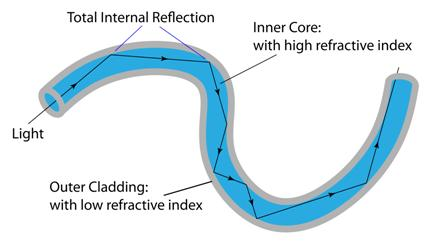

Figure 3: Total internal reflection in a flexible cable. (🔗 [source](https://todaystechnologyy.weebly.com/how-do-they-work.html))



 To achieve this, you can modify the setup from the final cell of the 'reflection in different media' section.

 You'll need a medium with a high refractive index in the middle, and two media with lower refractive indices either side of this. Ideally, you should also start your ray within the fibre core (the medium of higher refractive index).

In [ ]:
# Science

#########################################
#            YOUR VALUES HERE           #
#########################################

Next, try and draw several parallel rays propagating through a prism.

To achieve this, you can modify the setup from one of the cells in the 'Refraction' section.

In [ ]:
# Science

#########################################
#            YOUR VALUES HERE           #
#########################################

If all of the above was eas you're ready for some ninja-level coding challenges.

## Python ninjas 🥷

Now, try and create a prism that sits at an oblique angle to the x-axis, and send your set of parallel rays through this.

To do this, you will need to modify how the boundaries between media are set up. This will require you to make changes to the `refract_ray()` function. You will also need to set up your own plots to display this different boundary between media.

In [ ]:
# Science

#########################################
#            YOUR VALUES HERE           #
#########################################

Your final challenge is to create a converging lens. Lenses are essentially just pieces of glass with at least one curved surface which the light rays pass through. An example is shown below.



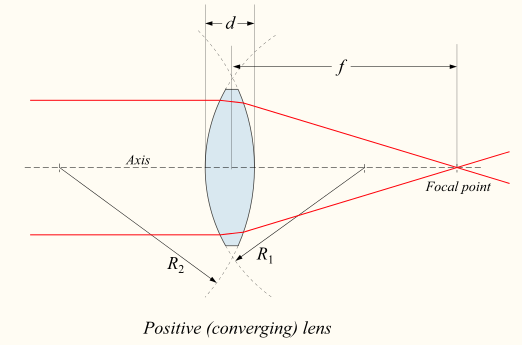

Figure 4: A converging lens with two incident parallel rays which meet at the focal point after passing through the lens. (🔗 [source](https://phys.libretexts.org/Bookshelves/University_Physics/Physics_(Boundless)/24%3A_Geometric_Optics/24.3%3A_Lenses))

In this case, you will need to create two curved lens surfaces using segments of two circles with radii $R_1$ and $R_2$

In [ ]:
# Science

#########################################
#            YOUR VALUES HERE           #
#########################################

Once you have created your lens, you should send at least 3 parallel rays through it so that you can measure the *focal length*, $f$. Analytically, the focal length of a lens of thickness $d$, refractive index $n$ and radii of curvature $R_1$ and $R_2$ is given by:

\begin{equation}
  \dfrac{1}{f} = (n-1)\left[\dfrac{1}{R_1} - \dfrac{1}{R_2} + \dfrac{(n-1)d}{nR_1R_2}\right]
\end{equation}

How does the focal length in your simulation compare to the analytical value expected for the values of $n, d, R_1,$ and $R_2$ that you chose?


In [ ]:
# Science

#########################################
#            YOUR VALUES HERE           #
#########################################